# Stock Price Prediction using LSTM , regression models

# IOT DOMAIN ANALYST PROJECT 19BEC0864,19BEC0256,19BEC0479

In [1]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# The historical data of stock prices of Apple was downloaded from Yahoo! Finance Website in the .csv format
# Website - https://finance.yahoo.com/quote/AAPL/history?p=AAPL

# Reading the CSV file

stock_symbol = 'GAIL.NS'
df = yf.download(tickers=stock_symbol,period='5y',interval='1d')


df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-12,165.449997,168.699997,164.449997,166.699997,166.699997,28053587
2022-04-13,167.949997,169.500000,167.000000,168.649994,168.649994,10989496
2022-04-18,167.149994,170.800003,167.000000,167.949997,167.949997,16318964
2022-04-19,169.399994,173.500000,168.350006,170.000000,170.000000,28068839
2022-04-20,171.449997,171.449997,163.600006,165.600006,165.600006,17614814


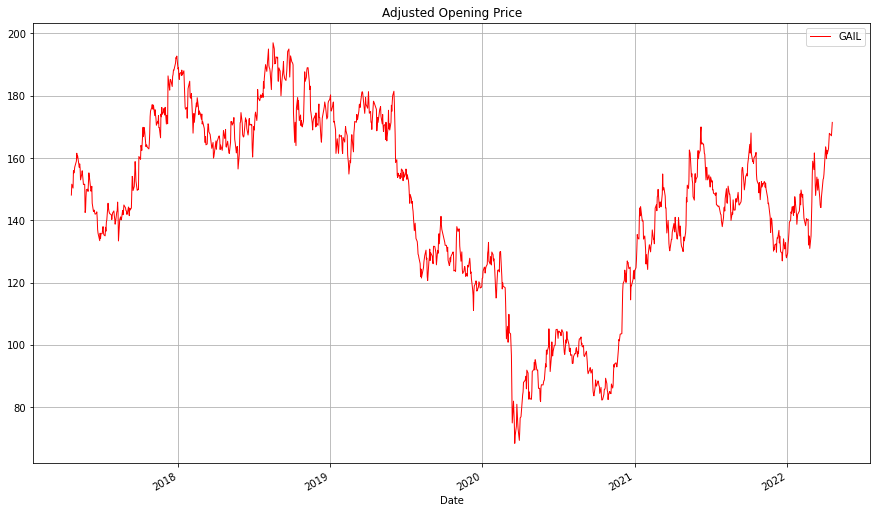

In [3]:
# Visualizing the stock prices

df['Open'].plot(label='GAIL', figsize=(15, 9), title='Adjusted Opening Price', color='red', linewidth=1.0, grid=True)
plt.legend()

In [4]:
# Rolling Mean / Moving Average to remove the noise in the graph and smoothen it

open_col = df['Open']
mvag = open_col.rolling(window=100).mean()     # Taking an average over the window size of 100.
# Increasing the window size can make it more smoother, but less informative and vice-versa.

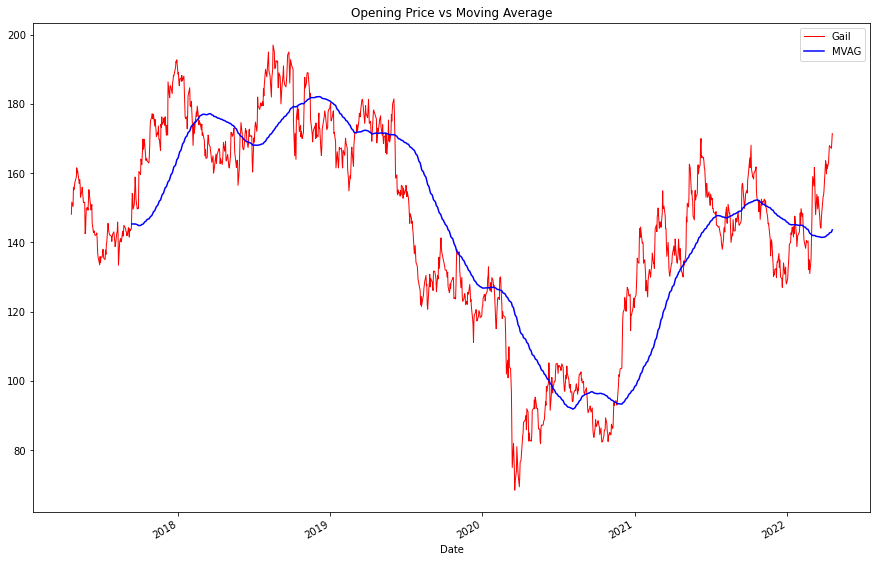

In [5]:
# Visualizing Rolling Mean and Adjusted Closing Price together

df['Open'].plot(label='Gail', figsize=(15,10), title='Opening Price vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')
plt.legend()

In [6]:
close_col = df['Close']

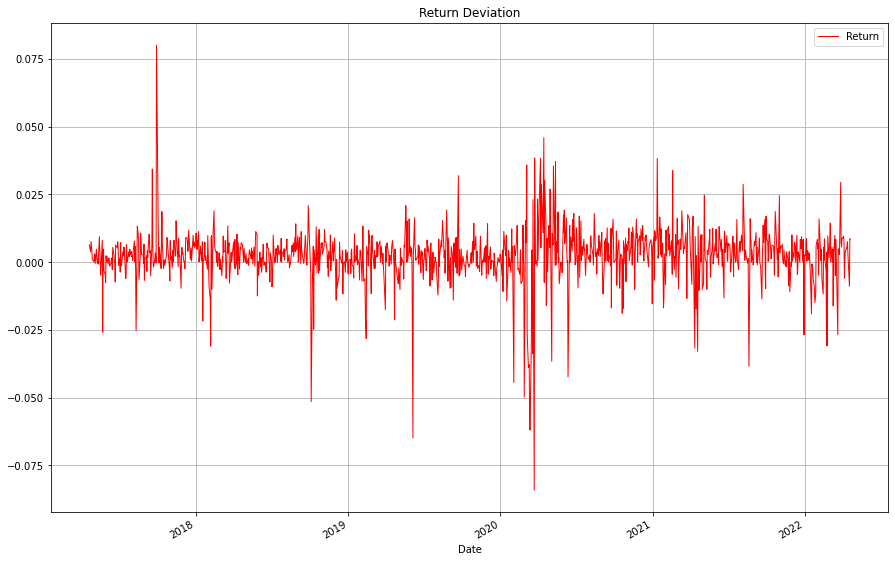

In [7]:
# Return Deviation measures the Mean of the Probability Distribution of Investment Returns if it has a positive/negative Average Net Outcome

rd = open_col / close_col.shift(1) - 1
rd.plot(label='Return', figsize=(15, 10), title='Return Deviation', color='red', linewidth=1.0, grid=True)
plt.legend()

In [8]:
# Number of days for which to predict the stock prices

predict_days = 30

In [9]:
# Shifting by the Number of Predict days for Prediction array

df['Prediction'] = df['Open'].shift(-predict_days)
# print(df['Prediction'])
# print(df['Adj Close'])

In [10]:
# Dropping the Prediction Row

X = np.array(df.drop(['Prediction'], axis = 1))
X = X[:-predict_days]      # Size upto predict days
# print(X)
print(X.shape)

(1206, 6)


In [11]:
# Creating the Prediction Row

y = np.array(df['Prediction'])
y = y[:-predict_days]      # Size upto predict_days
# print(y)
print(y.shape)

(1206,)


In [12]:
# Splitting the data into Training data & Testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)      #Splitting the data into 80% for training & 20% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(964, 6)
(964,)
(242, 6)
(242,)


## 1. Linear Regression
Building First model of regression - Linear Regression

In [13]:
# Defining the Linear Regression Model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)      # Training the algorithm

LinearRegression()

In [14]:
# Score of the Linear Regression Model (Using the Test Data)

# linear_model_score = linear_model.score(X_test, y_test)
# print('Linear Model score:', linear_model_score)
from sklearn.metrics import r2_score


y_pred =linear_model.predict(X_test)
print('R2 Score for Linear Regression : ', r2_score(y_test, y_pred))
Linear_score=r2_score(y_test, y_pred)


R2 Score for Linear Regression :  0.7519156403930465


In [15]:
# Define the Real & Prediction Values

X_predict = np.array(df.drop(['Prediction'], 1))[-predict_days:]

linear_model_predict_prediction = linear_model.predict(X_predict)
linear_model_real_prediction = linear_model.predict(np.array(df.drop(['Prediction'], 1)))

In [16]:
# Defining some Parameters

predicted_dates = []
recent_date = df.index.max()
display_at = 1000
alpha = 0.5

for i in range(predict_days):
    recent_date += (timedelta(days=1))
    predicted_dates.append(recent_date)

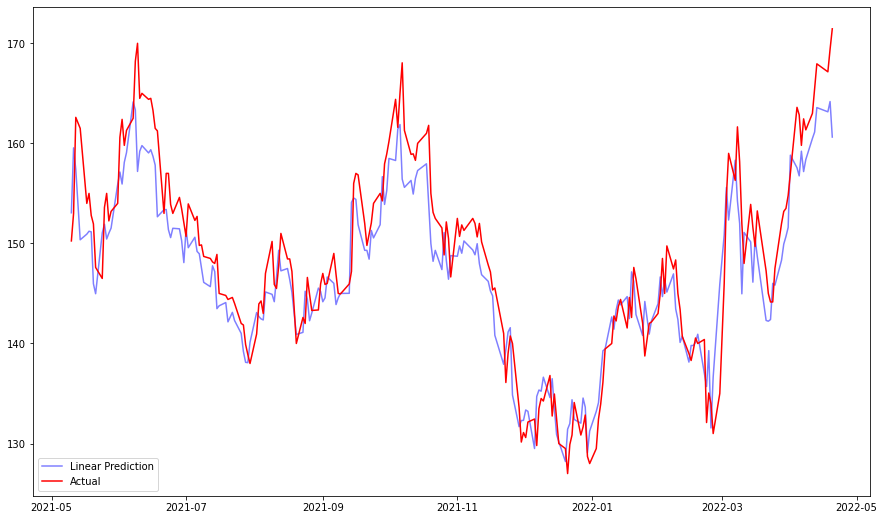

In [17]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))
plt.plot(df.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Prediction', color='blue', alpha=alpha)

plt.plot(df.index[display_at:], df['Open'][display_at:], label='Actual', color='red')
plt.legend()

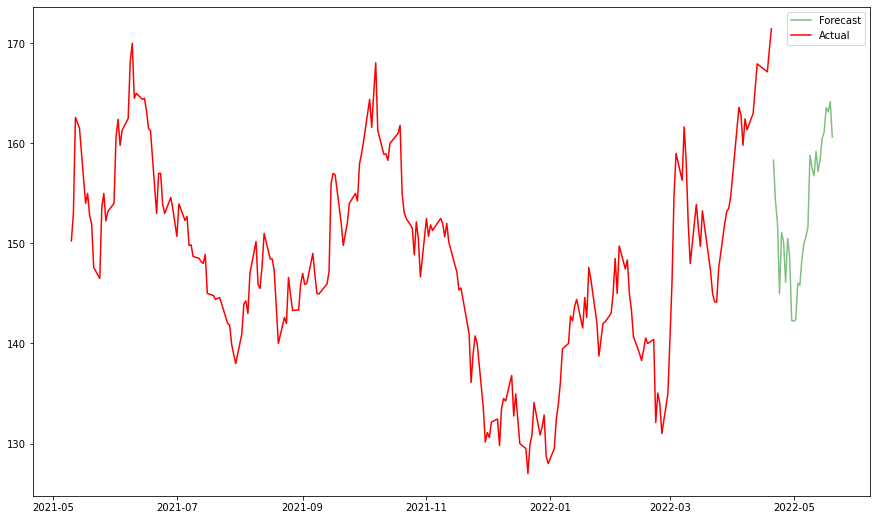

In [18]:
plt.figure(figsize=(15, 9))

plt.plot(predicted_dates, linear_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['Open'][display_at:], label='Actual', color='red')
plt.legend()

## 2. Ridge Regression
Building Second model of regression - Ridge Regression

In [19]:
# Defining the Ridge Regression Model

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)     # Training the algorithm

Ridge()

In [20]:
# Score of the Ridge Regression Model (Using the Test Data)

# ridge_model_score = ridge_model.score(X_test, y_test)


# print('Ridge Model score:', ridge_model_score)
y_pred =ridge_model.predict(X_test)
print('R2 Score for Ridge Regression: ', r2_score(y_test, y_pred))
Ridge_score=r2_score(y_test, y_pred)

R2 Score for Ridge Regression:  0.7519160089410093


In [21]:
# Define the Real & Prediction Values

ridge_model_predict_prediction = ridge_model.predict(X_predict)
ridge_model_real_prediction = ridge_model.predict(np.array(df.drop(['Prediction'], 1)))

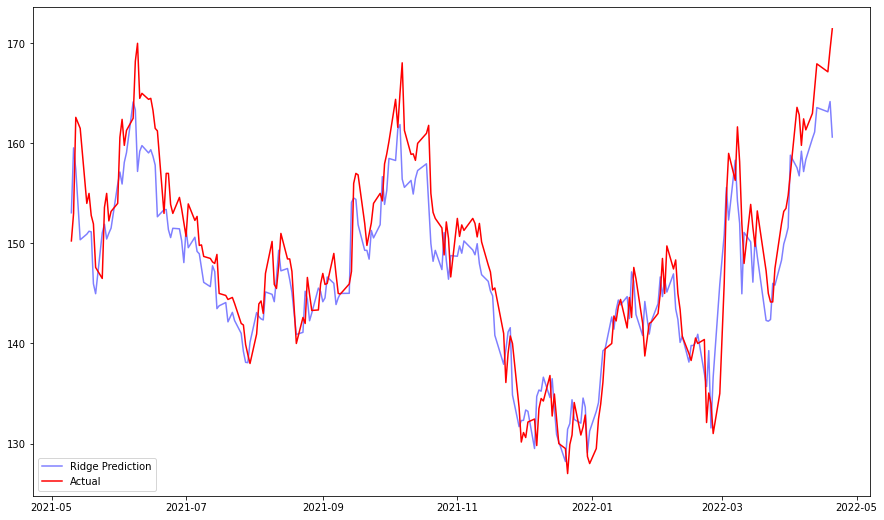

In [22]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))
plt.plot(df.index[display_at:], ridge_model_real_prediction[display_at:], label='Ridge Prediction', color='blue', alpha=alpha)

plt.plot(df.index[display_at:], df['Open'][display_at:], label='Actual', color='red')
plt.legend()

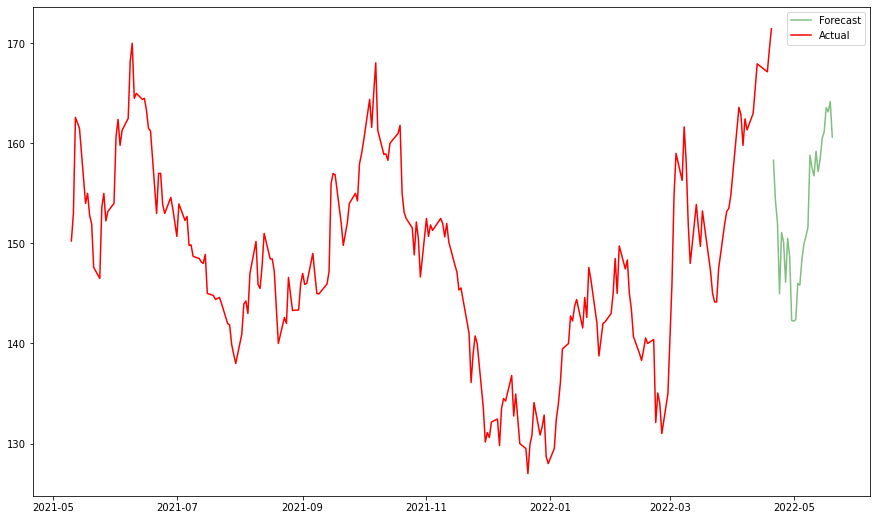

In [23]:
plt.figure(figsize=(15, 9))

plt.plot(predicted_dates, ridge_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['Open'][display_at:], label='Actual', color='red')
plt.legend()

## 3. Lasso Regression
Building Third model of regression - Lasso Regression

In [24]:
# Defining the Lasso Regression Model

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)     # Training the algorithm

Lasso()

In [25]:
# Score of the Lasso Regression Model (Using the Test Data)

# lasso_model_score = lasso_model.score(X_test, y_test)
# print('Lasso Model score:', lasso_model_score)



y_pred =lasso_model.predict(X_test)
print('R2 Score for Lasso Regression: ', r2_score(y_test, y_pred))
Lasso_score=r2_score(y_test, y_pred)

R2 Score for Lasso Regression:  0.752183528066147


In [26]:
# Define the Real & Prediction Values

lasso_model_predict_prediction = lasso_model.predict(X_predict)
lasso_model_real_prediction = lasso_model.predict(np.array(df.drop(['Prediction'], 1)))

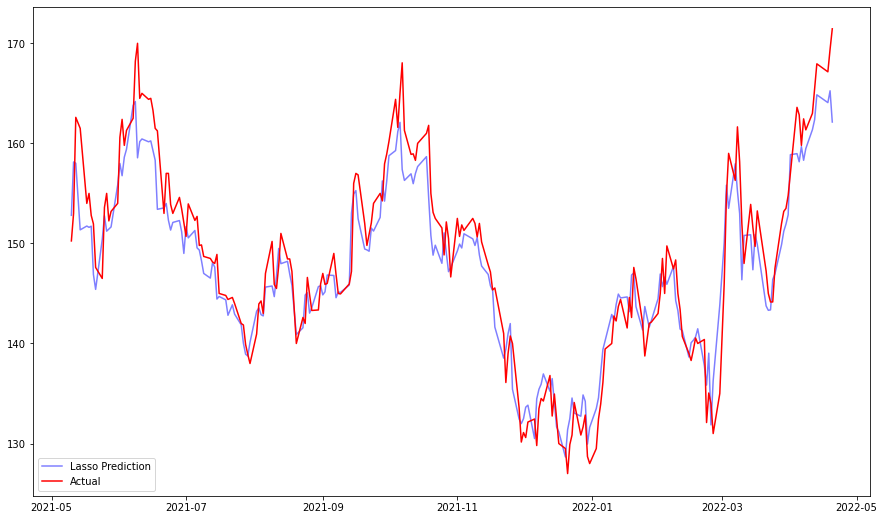

In [27]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))
plt.plot(df.index[display_at:], lasso_model_real_prediction[display_at:], label='Lasso Prediction', c='blue', alpha=alpha)

plt.plot(df.index[display_at:], df['Open'][display_at:], label='Actual', color='red')
plt.legend()

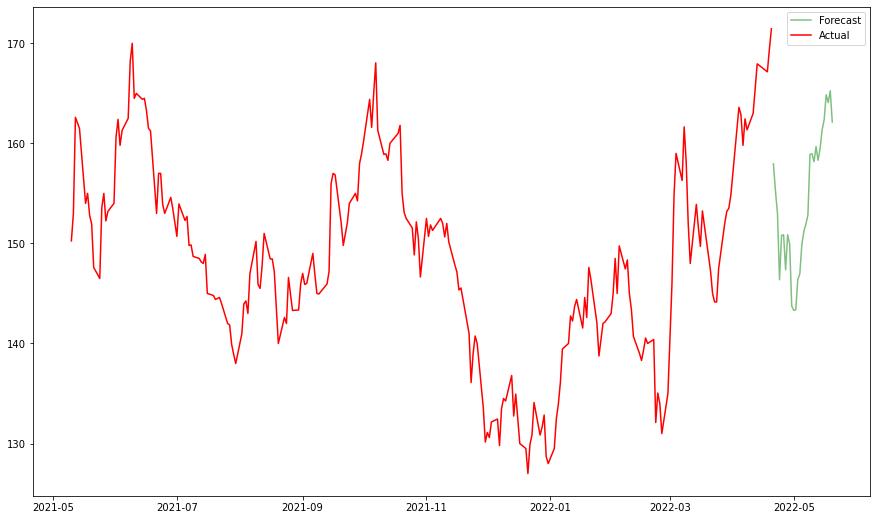

In [28]:
plt.figure(figsize=(15, 9))

plt.plot(predicted_dates, lasso_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['Open'][display_at:], label='Actual', color='red')
plt.legend()

In [29]:
print(Linear_score*100,Ridge_score*100,Lasso_score*100)

75.19156403930465 75.19160089410093 75.2183528066147


In [30]:
# Best Performance of the Regressor Models

best_score = max(Linear_score*100, Ridge_score*100,Lasso_score*100 )
index = np.argmax([Linear_score, Ridge_score,Lasso_score])
best_regressor = {0:'Linear Regression Model',
                  1:'Ridge Model',
                  2:'Lasso Model'}
print("The Best Performer is {0} with the score of {1}%.".format(best_regressor[index], best_score))

The Best Performer is Lasso Model with the score of 75.2183528066147%.


# FOR LSTM MODEL

In [31]:
#last 5 years data with interval of 1 day
data = yf.download(tickers=stock_symbol,period='5y',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [32]:
type(data)

pandas.core.frame.DataFrame

In [33]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-20,148.125031,154.500031,147.431290,150.656281,122.272049,18808013
2017-04-21,151.612534,153.375031,148.968781,149.812531,121.587257,7027147
2017-04-24,150.375031,155.325043,149.681290,154.762543,125.604675,10843829
2017-04-25,155.943787,155.962540,153.787537,154.312531,125.239449,7836211
2017-04-26,155.193787,157.556290,153.525040,154.968781,125.772041,9465781


In [34]:
len(data)

1236

In [35]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-12,165.449997,168.699997,164.449997,166.699997,166.699997,28053587
2022-04-13,167.949997,169.500000,167.000000,168.649994,168.649994,10989496
2022-04-18,167.149994,170.800003,167.000000,167.949997,167.949997,16318964
2022-04-19,169.399994,173.500000,168.350006,170.000000,170.000000,28068839
2022-04-20,171.449997,171.449997,163.600006,165.600006,165.600006,17614814


In [36]:
opn = data[['Open']]

<AxesSubplot:xlabel='Date'>

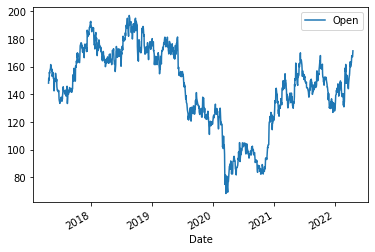

In [37]:
opn.plot()

In [38]:
import matplotlib.pyplot as plt

In [39]:
ds = opn.values

In [40]:
ds

array([[148.12503052],
       [151.61253357],
       [150.37503052],
       ...,
       [167.1499939 ],
       [169.3999939 ],
       [171.44999695]])

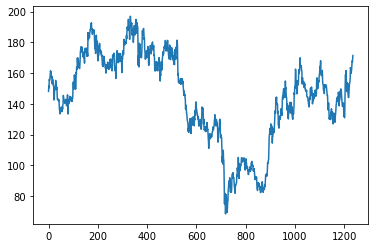

In [41]:
plt.plot(ds)

In [42]:
import numpy as np
from keras.models import load_model

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [45]:
len(ds_scaled), len(ds)

(1236, 1236)

In [46]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [47]:
train_size,test_size

(865, 371)

In [48]:
#Splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [49]:
len(ds_train),len(ds_test)

(865, 371)

In [50]:
#creating dataset in time series for LSTM model 
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [51]:
#Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [52]:
X_train.shape,y_train.shape

((764, 100), (764,))

In [53]:
X_test.shape, y_test.shape

((270, 100), (270,))

In [54]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [55]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [56]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))


In [57]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
12/12 [==============================] - 20s 708ms/step - loss: 0.1420 - val_loss: 0.0057
Epoch 2/100
12/12 [==============================] - 5s 449ms/step - loss: 0.0214 - val_loss: 0.0157
Epoch 3/100
12/12 [==============================] - 5s 436ms/step - loss: 0.0125 - val_loss: 0.0046
Epoch 4/100
12/12 [==============================] - 5s 423ms/step - loss: 0.0063 - val_loss: 0.0044
Epoch 5/100
12/12 [==============================] - 5s 435ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 6/100
12/12 [==============================] - 5s 439ms/step - loss: 0.0043 - val_loss: 0.0045
Epoch 7/100
12/12 [==============================] - 5s 429ms/step - loss: 0.0042 - val_loss: 0.0044
Epoch 8/100
12/12 [==============================] - 5s 446ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 9/100
12/12 [==============================] - 5s 430ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 10/100
12/12 [==============================] - 5s 431ms/step - loss: 0.0039 - val_l

In [58]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [59]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

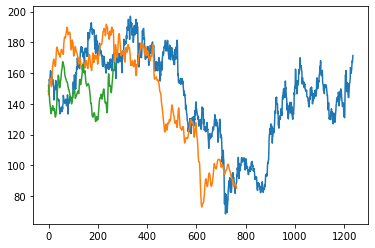

In [60]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [61]:
type(train_predict)

numpy.ndarray

In [62]:
test = np.vstack((train_predict,test_predict))

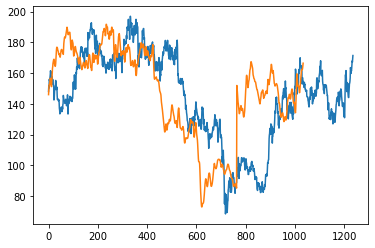

In [63]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [64]:
len(ds_test)

371

In [65]:
#Getting the last 100 days records
fut_inp = ds_test[271:]

In [66]:
fut_inp = fut_inp.reshape(1,-1)

In [67]:
tmp_inp = list(fut_inp)

In [68]:
fut_inp.shape

(1, 100)

In [69]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [70]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.7861247062683105], [0.7917417287826538], [0.7943515181541443], [0.7960257530212402], [0.7975305318832397], [0.7991408109664917], [0.8009582757949829], [0.803007185459137], [0.8052662014961243], [0.8076831698417664], [0.8101860284805298], [0.812695324420929], [0.8151330947875977], [0.8174302577972412], [0.8195329308509827], [0.8214043378829956], [0.823024570941925], [0.82439124584198], [0.8255146145820618], [0.8264156579971313], [0.8271224498748779], [0.8276656270027161], [0.8280767202377319], [0.8283843398094177], [0.8286137580871582], [0.8287850022315979], [0.8289135098457336], [0.8290086984634399], [0.8290768265724182], [0.829119861125946]]


In [71]:
len(ds_scaled)

1236

In [72]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

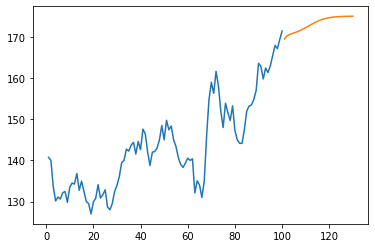

In [73]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[1136:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [74]:
ds_new = ds_scaled.tolist()

In [75]:
len(ds_new)

1236

In [76]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = model.predict(X_test)
model = Sequential()
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
Lstm_score=r2_score(y_test, y_pred)

R2 Score:  0.8109131632611257
MAE:  0.02645400657058298


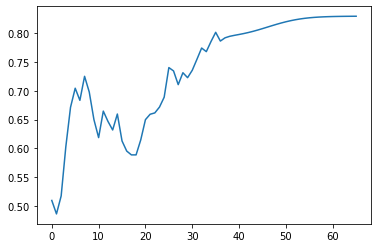

In [77]:
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

In [78]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

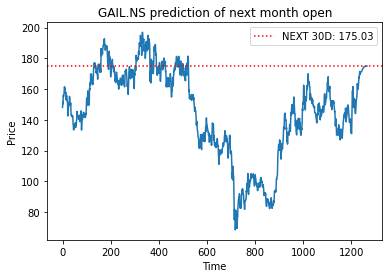

In [79]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

# COMPARIING DIFFERENT MODELS TO FIND THE BEST MODEL

In [80]:
print('Linear_score:',Linear_score*100)
print('Ridge_score:',Ridge_score*100)
print('Lasso_score:',Lasso_score*100)
print('Lstm_score:',Lstm_score*100)

Linear_score: 75.19156403930465
Ridge_score: 75.19160089410093
Lasso_score: 75.2183528066147
Lstm_score: 81.09131632611258


In [81]:
# Best Performance of the  Models

best_score = max(Linear_score*100, Ridge_score*100,Lasso_score*100 ,Lstm_score*100)
index = np.argmax([Linear_score, Ridge_score,Lasso_score,Lstm_score])
best_regressor = {0:'Linear Regression Model',
                  1:'Ridge Model',
                  2:'Lasso Model',
                  3:'Lstm Model'}
print("The Best Performer is {0} with the score of {1}%.".format(best_regressor[index], best_score))

The Best Performer is Lstm Model with the score of 81.09131632611258%.


In [82]:
r2_df = {'Linear Regression': [Linear_score*100], 'Ridge': [Ridge_score*100], 'Lasso': [Lasso_score*100], 'LSTM': [Lstm_score*100]}

In [83]:
r2_df = pd.DataFrame.from_dict(r2_df)

In [84]:
r2_df

,Linear Regression,Ridge,Lasso,LSTM
0,75.191564,75.191601,75.218353,81.091316


<AxesSubplot:>

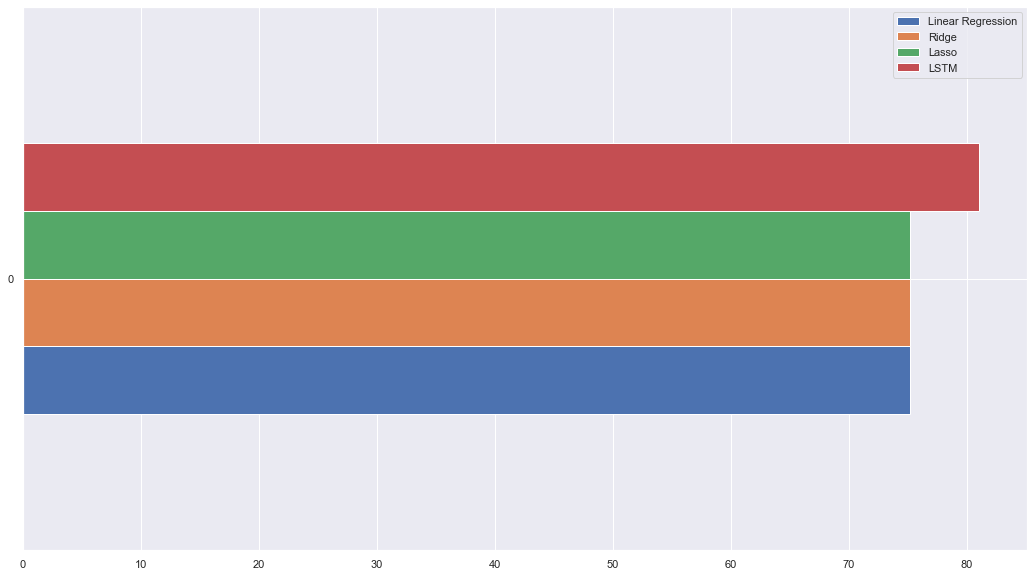

In [85]:
import seaborn as sns
sns.set(rc={'figure.figsize': (18,10)})
r2_df.plot(kind="barh")